170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


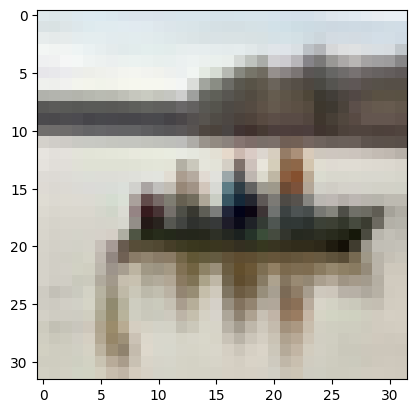

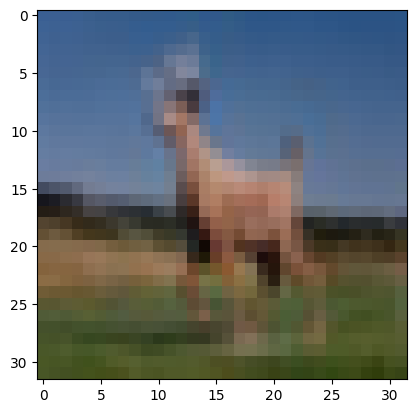

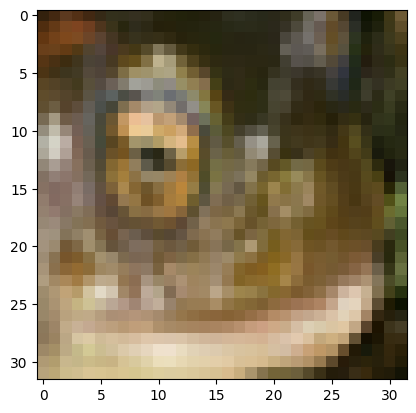

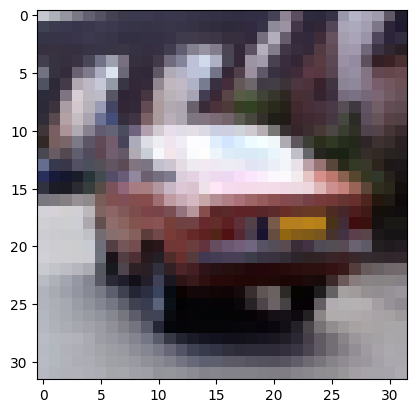

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - accuracy: 0.3341 - loss: 2.0358 - val_accuracy: 0.5246 - val_loss: 1.2872
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.5708 - loss: 1.2081 - val_accuracy: 0.6437 - val_loss: 1.0176
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6498 - loss: 0.9986 - val_accuracy: 0.6938 - val_loss: 0.8701
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Accuracy score is 69.38 %
Confusion matrix of Neural Network is 
 [[703  20  46  38  15  33  13  24  21  87]
 [  7 855   0   6   4   8   9   4   3 104]
 [ 68   4 449  42  86 202  93  43   1  12]
 [  7   9  27 362  42 416  92  28   1  16]
 [ 23   3  45  36 588 100  90 108   2   5]
 [  6   1  13  65  23 813  25  48   0   6]
 [  4   1  23  29  22  64 851   5   0   1]
 [  4   2  10  10  35 134  14 770   1  20]
 [ 91  66   8  39   1  35  19   8 641  92]
 [  6  47   3   9   1   8   7   8   5 906]] 



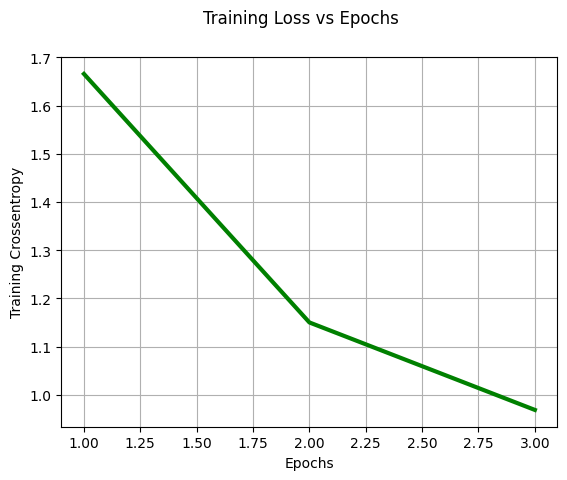

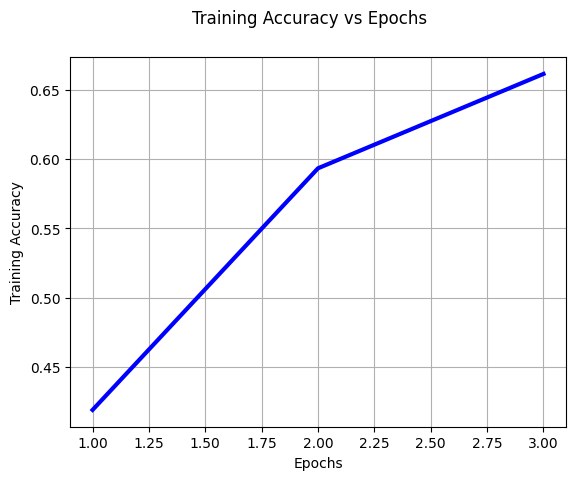

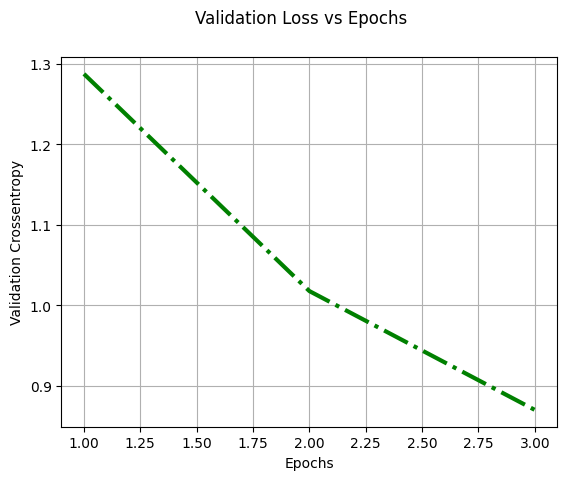

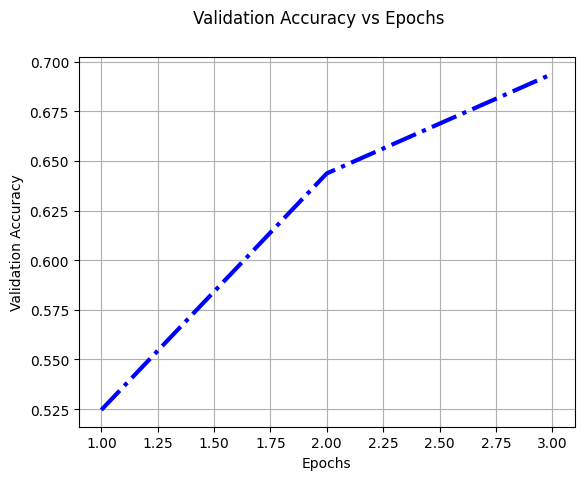

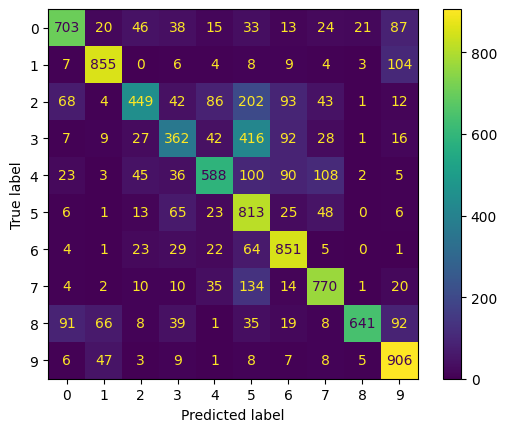

In [ ]:
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

nc = 10

#CIFAR is an acronym that stands for the Canadian
#Institute For Advanced Research and the CIFAR-10
#dataset was developed along with the CIFAR-100
#dataset by researchers at the CIFAR institute.

#The dataset is comprised of 60,000 32×32
#pixel color photographs of objects from 10 classes,
#such as frogs, birds, cats, ships, etc.
#The class labels and their standard associated
#integer values are listed below.

#0: airplane
#1: automobile
#2: bird
#3: cat
#4: deer
#5: dog
#6: frog
#7: horse
#8: ship
#9: truck

(Xtrain, ytrain), (Xtest, ytest) = cifar10.load_data()

plt.figure(1)
imgplot1 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()

plt.figure(2)
imgplot2 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()

plt.figure(3)
imgplot1 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()

plt.figure(4)
imgplot2 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()

Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain/ 255.0
Xtest = Xtest.astype('float32')
Xtest = Xtest / 255.0

ytrain = ytrain[:,0]
ytrainEnc = tf.one_hot(ytrain, depth=nc)
ytest = ytest[:,0]
ytestEnc = tf.one_hot(ytest, depth=nc)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(Xtrain, ytrain, epochs=3, validation_data=(Xtest, ytest))

ypred = model.predict(Xtest)
ypred = np.argmax(ypred,axis=1)

score = accuracy_score(ypred,ytest)
print('Accuracy score is',100*score,'%')

cmat = confusion_matrix(ytest, ypred)
print('Confusion matrix of Neural Network is \n',cmat,'\n')

plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'],'g-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Training Loss vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['accuracy'],'b-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.grid(1,which='both')
plt.suptitle('Training Accuracy vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_loss'],'g-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Validation Loss vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_accuracy'],'b-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(1,which='both')
plt.suptitle('Validation Accuracy vs Epochs')
plt.show()

disp = ConfusionMatrixDisplay(confusion_matrix=cmat)
disp.plot()